Importing all the required packages

**NOTE** : Please enter Category Names same as folder name

Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

Splitting the data into training and testing data

This Part of code may take a while for training the data using SVC model

====================

=========================

Predicting our testing data

Using Pickle to save the model to disk

The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

Enter URL of Image/content/drive/MyDrive/Dataset/runtrain.jpg


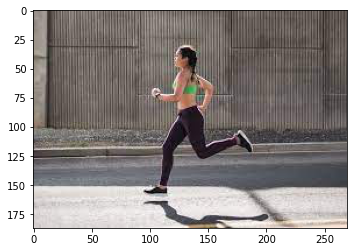

run = 52.41190241010033%
walk = 13.906430388426488%
kick = 33.68166720147313%
The predicted image is : kick
Is the image a kick ?(y/n)
y
Thank you for your feedback


In [ ]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")


This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)

===========================